In [ ]:
import pandas as pd
df = pd.read_csv('TTM.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-02,31.370001,31.860001,31.290001,31.719999,31.719999,992500
1,2017-10-03,32.020000,32.110001,31.860001,31.980000,31.980000,716500
2,2017-10-04,32.310001,32.419998,32.180000,32.209999,32.209999,632200
3,2017-10-05,32.500000,32.500000,32.220001,32.270000,32.270000,894300
4,2017-10-06,32.160000,32.259998,32.000000,32.240002,32.240002,417100
...,...,...,...,...,...,...,...
1253,2022-09-23,25.690001,25.780001,25.219999,25.469999,25.469999,748900
1254,2022-09-26,24.190001,24.600000,24.070000,24.280001,24.280001,825800
1255,2022-09-27,24.650000,24.660000,24.040001,24.370001,24.370001,795600
1256,2022-09-28,24.389999,24.900000,24.320000,24.809999,24.809999,495700


In [ ]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2017-10-02,31.719999
1,2017-10-03,31.980000
2,2017-10-04,32.209999
3,2017-10-05,32.270000
4,2017-10-06,32.240002
...,...,...
1253,2022-09-23,25.469999
1254,2022-09-26,24.280001
1255,2022-09-27,24.370001
1256,2022-09-28,24.809999


In [ ]:
import datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2001-02-23')
datetime_object


datetime.datetime(2001, 2, 23, 0, 0)

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      2017-10-02
1      2017-10-03
2      2017-10-04
3      2017-10-05
4      2017-10-06
          ...    
1253   2022-09-23
1254   2022-09-26
1255   2022-09-27
1256   2022-09-28
1257   2022-09-29
Name: Date, Length: 1258, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2017-10-02,31.719999
2017-10-03,31.980000
2017-10-04,32.209999
2017-10-05,32.270000
2017-10-06,32.240002
...,...
2022-09-23,25.469999
2022-09-26,24.280001
2022-09-27,24.370001


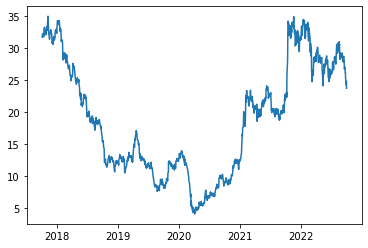

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])


In [ ]:
import numpy as np
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df
windowed_df = df_to_windowed_df(df, 
                                '2021-09-02', 
                                '2022-09-29', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-09-02,19.760000,19.680000,20.180000,19.910000
1,2021-09-03,19.680000,20.180000,19.910000,20.200001
2,2021-09-07,20.180000,19.910000,20.200001,19.760000
3,2021-09-08,19.910000,20.200001,19.760000,19.820000
4,2021-09-09,20.200001,19.760000,19.820000,20.209999
...,...,...,...,...,...
266,2022-09-23,26.889999,26.250000,26.250000,25.469999
267,2022-09-26,26.250000,26.250000,25.469999,24.280001
268,2022-09-27,26.250000,25.469999,24.280001,24.370001
269,2022-09-28,25.469999,24.280001,24.370001,24.809999


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((271,), (271, 3, 1), (271,))

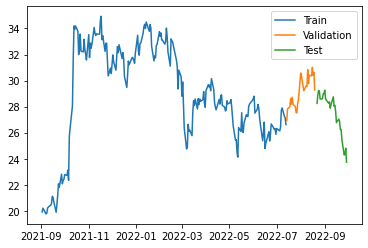

In [ ]:
q_80 = int(len(dates)* .8)
q_90 = int(len(dates)* .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 100ms/step - loss: 852.8280 - mean_absolute_error: 28.9454 - val_loss: 824.6235 - val_mean_absolute_error: 28.6928
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 809.4590 - mean_absolute_error: 28.1877 - val_loss: 781.6910 - val_mean_absolute_error: 27.9346
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 765.2699 - mean_absolute_error: 27.3955 - val_loss: 733.6007 - val_mean_absolute_error: 27.0600
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 712.4594 - mean_absolute_error: 26.4028 - val_loss: 670.0804 - val_mean_absolute_error: 25.8592
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 641.2393 - mean_absolute_error: 25.0101 - val_loss: 585.1511 - val_mean_absolute_error: 24.1604
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 544.7063 - mean_absolute_error: 22.9790 - val_loss: 466.4536 - val_mean_absolute_error: 21.

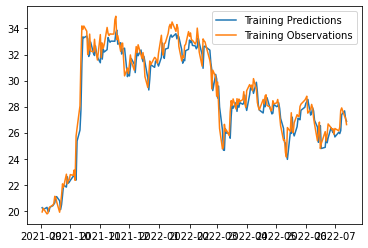

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

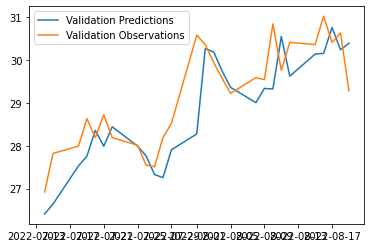

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

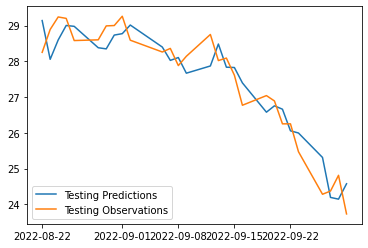

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

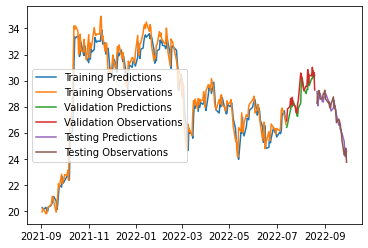

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

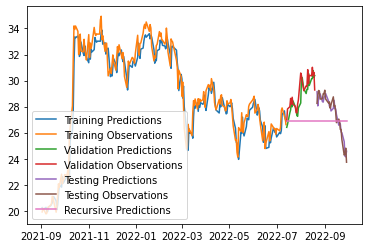

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])